# Report Notebook

#### Identifying Olympic Athletes that used Performance Enhancing Drugs during the past Summer Olympic Games. 
## Contents
- Notebook Summary
- Library and data importing
- Data / Data Understanding
- Exploratory Data Analysis
- Data Preprocessing
- Baseline Model and Evaluation
- Model Iterations
- Conclusions drawn from final model

## Notebook Summary

This notebook provides a high level summary of the process undergone to achieve the task of identifying PED use amongst Olympic Athletes. The data used for this project was gathered from multiple different sources in an attempt to find which variables play a role in determining positive or negative PED use. During the initial analysis, I chose to select the results of track and field events for a predicitive classification model. This being due to the fact that a majority of the track and field events contain heats (rounds) which provide event results for each individual athlete and per each individual race. 

## Data
- The data for this project was gathered from many different sources and can be found below, the files are located in the [data directory](https://github.com/jwong853/Olympic_PED_use/tree/master/data).


|  folder/file | description | link  |
|------|---|---|
| athletes_dataset/athlete_events.csv  | Athletes that competed in the Summer Olympic Games from Athens-1896 to Rio-2016. Also includes data on weight, height, age, etc.  | [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)  |   |
|    athletes_by_event  | .csv files containing all athletes competing in track and field events during the Summer Olympic Games (2004-2016)   | [Olympedia](http://www.olympedia.org/athletes) |   |
| results_by_event | .csv files containing results from each track and field event per Olympic Summer Games  | [Olympedia](http://www.olympedia.org/games/results)  |   |
| results.csv  | results from each track and field event combined into a .csv  | [Olympic](https://www.olympic.org/olympic-results)  |   |
|  ADRVs_by_sport    | .pdf files containing number of tests and doping positives (WADA has only released reports from the years 2013-2017  | [Athletics Integrity](https://www.athleticsintegrity.org/disciplinary-process/global-list-of-ineligible-persons?order-by=disqualificationPeriod&sort=desc&isDopingViolation=yes#filters)  |     
| wiki_doping.csv  | List of doping cases in athletics | [Wikipedia](https://en.wikipedia.org/wiki/List_of_doping_cases_in_athletics)  |   |
 
#### 

- The [base dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) used was retrieved from Kaggle and contained athletes from the Summer Olympic Games for the past 120 years. This [athlete dataset](https://github.com/jwong853/Olympic_PED_use/tree/master/data/athletes_dataset) also provides information on athletes such as gender, country, weight, and height. From there, each track and field  event results were scraped from [Olympic.org](https://www.olympic.org/olympic-results) and merged with the athlete dataframe by matching names. A dataset containing athletes with positive PED cases was scraped from [Wikipedia](https://en.wikipedia.org/wiki/List_of_doping_cases_in_athletics). 

 Then performed Exploratory Data Analysis to get a better understanding of the data I was working with. This included created visualizations such as correlation plots and bar graphs showing positive PED tests in each Olympic Game.

 After getting a complete dataframe I moved on to the data preprocessing, filling missing values as well as scaling numerical and encoding categorical features. 

### Data Understanding

- Below is a an example record from the dataframe and a table listing the features used for this project.

In [5]:
import pandas as pd
df = pd.read_csv('../../data/model_df_5.csv', low_memory=False)
df.head(1)

,name,sex,age,height,weight,team,noc,games,year,season,...,womens_long_12,womens_long_16,womens_high_04,womens_high_08,womens_high_12,womens_triple_04,womens_triple_08,womens_triple_12,womens_triple_16,events
0,Abdalla Abdelgadir,1,21.0,170.0,58.0,Sudan,SUD,2008 Summer,2008,Summer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 

| Feature  | Description  |
|---|---|
| __ID__  | Identification number used by creator of dataset, not WADA or World Athletics  |
| __NAME__  | Athlete's Name  |
| __SEX__  | Athlete's Gender  |
| __AGE__  | Athlete's Age  |
| __HEIGHT__  | Athlete's height measured in centimeters  |
| __WEIGHT__  | Athlete's weight measured in kilograms  |
| __NOC__  | National Olympic Committee the athlete represents |
| __TEAM__ | Country Athlete represents |
| __GAMES__ | Specific Olympic Games athlete competed in |
| __CITY__  | City the Olympic Games were held in |
| __YEAR__  | Year of Olympic Games the athlete competed in  |
| __CITY__  | City the Olympic Games were held in  |
| __EVENT__  | Specific event(s) the athlete competed in. This feature was converted to numerical values.  |
| __EVENTS__ | Number of event results for the athlete |
| __MEDAL__  | Indicates if an athlete won a Gold, Silver, or Bronze Medal. This feature was converted to numerical values using 0: no medal, 1:  |
| __EVENT RESULTS__  | The remaining features in the dataset are the results from each individual event in the Athletics Sport of the Olympic Games. There are results from each year as well as for each gender.  |

##### 

- Note: ID, NAME, GAMES, SEASON, SPORT, TEAM, NOC, and CITY were removed from the dataframe for modeling. Since all of the data is from the Olympic Summer Games, there wasn't a need for season. 'SPORT' contained a constant value since these results are only from the track and field events of Athletics and the 'TEAM' feature provided the same information as the 'NOC' feature. These features were removed since there were too many different values to convert them to categorical features. City was removed since the city is indicated by the 'YEAR' feature depending on which year the Olympic Summer Games were held.

## Libraries and Data Importing

#### _The libraries used for this project can be found in the environment.yml file [here](https://github.com/jwong853/Olympic_PED_use/blob/master/environment.yml)._

In [6]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### EDA and data preprocessing libraries

In [116]:
import requests
from requests import get
import numpy as np
import seaborn as sns
sns.set(font_scale=1.6)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pdfplumber
import tabula
from Olympic_PED_use.src import functions as fn


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


from bs4 import BeautifulSoup
import certifi
import urllib3
import re
from csv import DictReader, DictWriter

#### Modeling and evaluation libraries

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
import xgboost as xgb
import eli5

##### Loading in the .zip file containin athletes and general information, The cell for unzipping the athletes file is below for reference but the dataset will be loaded with a function from the [src](https://github.com/jwong853/Olympic_PED_use/tree/master/src) folder.

In [4]:
from zipfile import ZipFile
zf = ZipFile('../../data/athletes_dataset/compressed_athlete_events.zip', 'r')
zf.extractall('../../data/athletes_dataset/')
zf.close()

#### Loading in the preprocessed dataframe, if you would like to see how the event results were obtained and merged to the athlete dataframe, the code is located in the EDA notebook. There is also an example provided below.

In [9]:
df = pd.read_csv('../../data/model_df_5.csv', low_memory=False)

## Data Preprocessing
### To see the preprocessing steps in more detail, take a look over the [EDA notebook](https://github.com/jwong853/Olympic_PED_use/blob/master/notebooks/EDA.ipynb)

 - As discussed earlier the creation of this model was to aid the IOC in identifying PED use. Performing initial Exploratory Data Analysis allowed me to scrape together a dataset with only athletes that competed in the Summer Games from 2004-2016. To do this, I created individual tables for each event per year. These tables were then combined together and ordered by year of Olympic Games.  

 - Next, I repeated the above process for the results of each event. Since there are athletes that compete in more than one event as well as more than one Olympic Game, I chose to add these results to the dataset as individual columns. Since a majority of the datasets containing this information were from Olympedia, creating a dataframe and merging the results with the atheltes did not pose many issues.

 - From there, I scraped multiple datasets containing athletes that had been flagged for PED use during the Olympics and only kept the data relevant for 2004-2016 Summer Sports. After cross-referencing the datasets, I ended up with a dataset containing 579 records for doping. To indicate whether or not an athlete had been found guilty of doping in the athelte dataset, I created a binary feature showing 1 for positive PED use and 0 for negative PED use. When trying to join this feature to the athlete dataframe, I was only successful in matching around 85 athletes from the doping datasets. Not all of the 579 athletes in the doping records were from the Summer Games, I found multiple event results from non-Olympic sporting events held during the same time period. After removing as many as I could find and formatting the names in the doping dataset with the help of FuzzyWuzzy, I was able to match on around 240 athletes. There were quite a few athletes from the event results with alternative name spellings or different punctuation. I used the FuzzyWuzzy library to find partial matches on the names, and then replace the names that did not match, I ended up with around 240 matches.
 
 - After combining these datasets, I needed to prepare the data for modeling. I began by filling the missing values for event results with 0 since the athlete had not participated in that event. Then, I subsetted the numerical features and categorical features seperately, Standard Scaling the numerical features and One Hot Encoding the categorical features. Out of the 5,880 athlete records in the athlete dataframe, there were still 3,173 athletes that I was not able to match results for. I chose to remove these athletes since they would not provide any data on the events. After removing them, the dataframe contained 2707 athlete records with 245 of them having tested positive for PED use. 
 
 - The features below had provided results as strings and in the format (minutes : seconds . milliseconds) which cannot be converted to a float. I chose to convert these values to the total time in seconds, this also would allow for all of the track results to be on the same time scale (seconds).
 
|__Event Results in Minutes__   |
|---|
| 800 Meter Run  |
| 1500 Meter Run  |
| 5000 Meter Run  |
| 10,000 Meter Run  |
| 20 Km Walk Race  |
| 50 Km Walk Race  |
| 3000 Meter Steeple Chase  |


I have provided an example of the preprocessing steps taken when loading in each result table
- Scraping the result table
- Creating a dataframe with the results
- Renaming the column with results to the name of the event and the year it was held in order to reference which column represents which event in the dataframe when the results are matched to the athlete dataframe.
- Inserting a column 'event_x' to match the results to the athlete dataframe by. The event results are matched to the athlete dataframe by matching 'name' and 'event' values.
- Setting the renamed results column to only hold the event times and not the strings before and after the times.

In [10]:
beijing_100H_women = fn.olympic_query('beijing', '2008', '100m-hurdles-women')
womens_100H_08 = fn.olympic_scraper(beijing_100H_women)
womens_100H_08 = fn.content_cleaner(womens_100H_08)
womens_100H_08.columns = ['rank', 'name', 'womens_100H_08']
womens_100H_08.insert(3, "event_x", "Athletics Women's 100m Hurdles")
womens_100H_08.womens_100H_08 = [str(x) for x in womens_100H_08.womens_100H_08]
womens_100H_08.womens_100H_08 = [x[:5] for x in womens_100H_08.womens_100H_08]
womens_100H_08.womens_100H_08 = [x.strip() for x in womens_100H_08.womens_100H_08]
womens_100H_08.womens_100H_08 = [x.strip('/ DPG') for x in womens_100H_08.womens_100H_08]
womens_100H_08.name = [x.strip() for x in womens_100H_08.name]
womens_100H_08

,rank,name,womens_100H_08,event_x
0,1.,Dawn Harper,12.54,Athletics Women's 100m Hurdles
1,2.,Sally Pearson,12.64,Athletics Women's 100m Hurdles
2,3.,Priscilla Lopes-Schliep,12.64,Athletics Women's 100m Hurdles
3,4.,Damu Cherry,12.65,Athletics Women's 100m Hurdles
4,5.,Delloreen Ennis-London,12.65,Athletics Women's 100m Hurdles
...,...,...,...,...
116,4.,Aleesha Barber,13.01,Athletics Women's 100m Hurdles
117,5.,Ievgeniia Snigur,13.06,Athletics Women's 100m Hurdles
118,6.,Nadine Faustin,13.25,Athletics Women's 100m Hurdles
119,7.,Dedeh Erawati,13.49,Athletics Women's 100m Hurdles


## Exploratory Data Analysis

 The bar graph below shows the number of doping positives per Olympic Game. The amount of Doping cases has been on an upwards trend until the London Games in 2012. This could be due to the fact that the World Anti-Doping Agency was not created until the late 90's. The goal of WADA is to promote and coordinate the fight against doping in sports. The World Anti-Doping Code was not created until 2003, which provides an international standard for testing and investigation within elite sports organizations *(WADA, Who We Are 2020)*. It is hard to say whether there's been a significant increase in doping or if this is due to the limitations of testing.

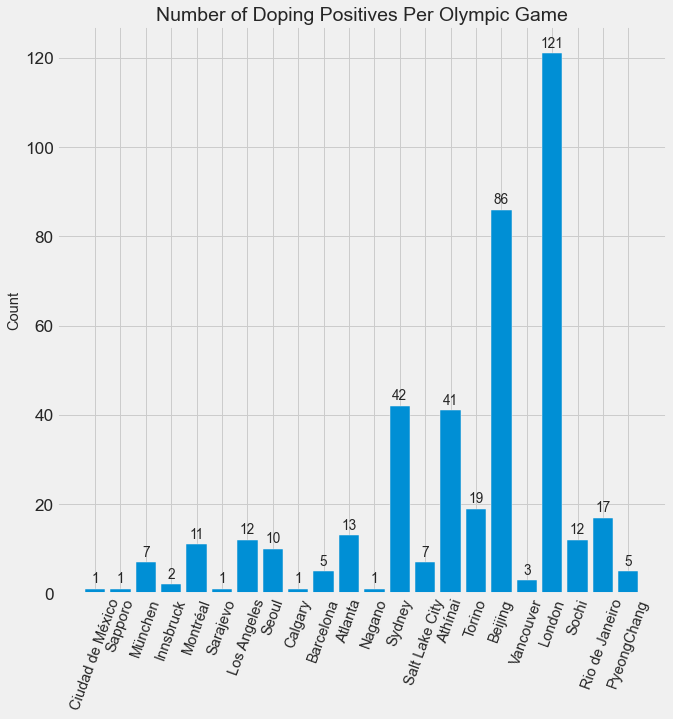

In [128]:
url = 'https://olympstats.com/2019/01/18/all-olympic-doping-positives-the-count-by-games/'
req = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',
                         ca_certs=certifi.where())
res = req.request('GET', url)
soup = BeautifulSoup(res.data, 'html.parser')
contents = soup.find_all(class_= 'table-responsive')    
ped_by_country_df = pd.read_html(str(contents))[0]
ped_by_country_df
ped_by_country_df = ped_by_country_df.drop(22)
ped_by_country_df.sort_values('Year', inplace=True)

x = ped_by_country_df.City
width = 0.3
labels = ped_by_country_df['City']

fig, ax = plt.subplots(figsize=(10,10), dpi=70)
rect = ax.bar(ped_by_country_df['City'], ped_by_country_df['###'])
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Number of Doping Positives Per Olympic Game', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15, rotation=70)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect)


plt.show();

#### Below is a plot of the number of doping positives vs negatives. Only having 245 positive PED use cases out of 2,462 records poses an issue with class imbalance. To resolve this, I added SMOTE Oversampling as well as Random Undersampling into the pipeline.

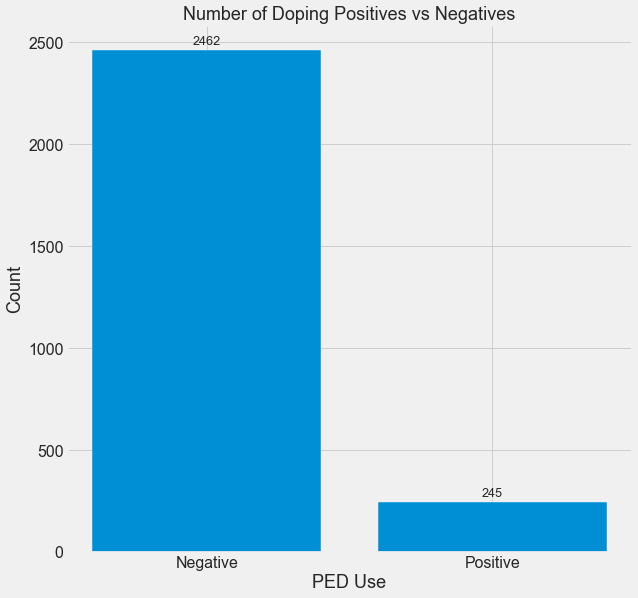

In [130]:
pivot_flagged = df.pivot_table(index='flagged', values='event', aggfunc='count')
fig, ax = plt.subplots(figsize=(10,10), dpi=65, )
rect = ax.bar(pivot_flagged.index, pivot_flagged.event, tick_label=['Negative', 'Positive'])
plt.xlabel('PED Use', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Number of Doping Positives vs Negatives', fontsize=20)
autolabel(rect)
plt.savefig('../figures/doping_counts.png', orientation='landscape', bbox_inches='tight',
           transparent=True)
plt.show();

# 

# 

#### Removing features as mentioned above

In [13]:
df = df.drop(['name', 'noc', 'games', 'season',
            'sport', 'team', 'city'], axis=1)

#### Defining continuous and categorical variables to be scaled and encoded

In [14]:
cont_features =  list(df.columns[8:161])
cont_features.extend(['height', 'weight', 'age'])
cat_features = ['sex', 'year', 'medal', 'event']

## Pipeline
#### Creating a pipeline to preprocess the data and fit a dummy classifier. 

In [15]:
cont_transformer = Pipeline(steps=[('ss', StandardScaler())])
cat_transformer = Pipeline(steps=[('ohe', OneHotEncoder(drop='first'))])
preprocessor = ColumnTransformer(
        transformers=[
            ('cont', cont_transformer, cont_features),
             ('cat', cat_transformer, cat_features)])

baseline_pipe = Pipeline(steps=[('preprocess', preprocessor),
                       ('classifier', DummyClassifier())])
baseline_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['mens_100m_04',
                                                   'mens_100m_08',
                                                   'mens_100m_12',
                                                   'mens_100m_16',
                                                   'mens_200m_04',
                                                   'mens_200m_08',
                                                   'mens_200m_12',
                                                   'mens_200m_16',
                                                   'mens_400m_04',
                                                   'mens_400m_08',
                                                   'mens_400m_12',
                                                   'mens_400m_16',
                                                   'mens_800m_04',
                                                   'mens_800m_08',
                                                   'mens_800m_12',
                                                   'mens_800m_16',
                                                   'mens_1500m_04',
                                                   'mens_1500m_08',
                                                   'mens_1500m_12',
                                                   'mens_1500m_16',
                                                   'mens_5000m_04',
                                                   'mens_5000m_08',
                                                   'mens_5000m_12',
                                                   'mens_5000m_16',
                                                   'mens_110H_04',
                                                   'mens_110H_08',
                                                   'mens_110H_12',
                                                   'mens_110H_16',
                                                   'mens_400H_04',
                                                   'mens_400H_08', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'year', 'medal',
                                                   'event'])])),
                ('classifier', DummyClassifier())])

#### Performing train test split and label encoding the target variable

In [42]:
X = df.drop('flagged', axis=1)
y = df.flagged
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Baseline Model
#### Dummy Classifier
- Cross Validating with Stratified KFolds to preserve the distribution of positive and negative PED classes.
- Optimizing the model for recall to limit the amount of false negative, athletes classified as not positive for PED use when in fact they are.

In [53]:
cv = StratifiedKFold()
fsm_train_acc = []
fsm_test_acc = []
fsm_train_recall = []
fsm_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    bp = baseline_pipe
    bp.fit(X_t, y_t)
    y_hat_t = bp.predict(X_t)
    
    fsm_train_acc.append(accuracy_score(y_t, y_hat_t))
    fsm_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = bp.predict(X_val)
    
    fsm_test_acc.append(accuracy_score(y_val, y_hat_val))
    fsm_test_recall.append(recall_score(y_val, y_hat_val))
        
print('\nAverage training accuracy: \n', np.mean(fsm_train_acc))
print('\nAverage validation accuracy: \n', np.mean(fsm_test_acc))
print('\nAverage training recall: \n', np.mean(fsm_train_recall))
print('\nAverage validation recall: \n', np.mean(fsm_test_recall))
fsm_fpr, fsm_tpr, thresholds = roc_curve(y_val, y_hat_val)
fsm_roc_auc = auc(fsm_fpr, fsm_tpr)
print('\nModel"s ROC-AUC score: \n', fsm_roc_auc)


Average training accuracy: 
 0.8310344827586207

Average validation accuracy: 
 0.8408866995073891

Average training recall: 
 0.0910369553226696

Average validation recall: 
 0.11426426426426425

Model"s ROC-AUC score: 
 0.5207957957957958


### Evaluation
- The dummy classifier is not performing very well at classifying the positive class. This is due to the default strategy parameter 'stratified', which classifies by the class distribution of the training set.
- A recall score of approximately 11% indicates that out of all positive PED use cases, the model correctly classified 11% of them as positive cases.
- A roc-auc score of 51% indicating the model is not performing very well at distinguishing the positive from the negative classes.

## Model Iterations

### Decision Tree Classifier

In [54]:
dtree_pipe = Pipeline(steps=[('preprocess', preprocessor),
                       ('classifier', DecisionTreeClassifier())])
cv = StratifiedKFold()
dtree_train_acc = []
dtree_test_acc = []
dtree_train_recall = []
dtree_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    dp = dtree_pipe
    dp.fit(X_t, y_t)
    y_hat_t = dp.predict(X_t)
    
    dtree_train_acc.append(accuracy_score(y_t, y_hat_t))
    dtree_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = dp.predict(X_val)
    
    dtree_test_acc.append(accuracy_score(y_val, y_hat_val))
    dtree_test_recall.append(recall_score(y_val, y_hat_val))
    
print('\nAverage training accuracy: \n', np.mean(dtree_train_acc))
print('\nAverage validation accuracy: \n', np.mean(dtree_test_acc))
print('\nAverage training recall: \n', np.mean(dtree_train_recall))
print('\nAverage validation recall: \n', np.mean(dtree_test_recall))
dtree_fpr, dtree_tpr, thresholds = roc_curve(y_val, dp.predict(X_val))
dtree_roc_auc = auc(dtree_fpr, dtree_tpr)
dtree_roc_auc
print('\nModel"s ROC-AUC score: \n', dtree_roc_auc)


Average training accuracy: 
 1.0

Average validation accuracy: 
 0.9295566502463053

Average training recall: 
 1.0

Average validation recall: 
 0.5983483483483484

Model"s ROC-AUC score: 
 0.8269519519519519


### Evaluation
- The decision tree classifier with default parameters performed significantly better than the dummy classifier with an increased recall score of 60%. The dummy classifier had a recall score of 11%.
- The model is performing better on the training than the validation set, indicating the model is overfit.
- A ROC-AUC score of 83%, indicating the model is performing well at distinguishing the positive from the negative PED use classes.

### Grid Search with a Decision Tree Classifier

In [56]:
dtree_params = {'classifier__max_depth': [5, 7, 10, 15, 25, 40, 80, 120],
              'classifier__criterion': ['gini', 'entropy'],
              'classifier__min_samples_split':[2, 4, 6, 10, 15, 20, 40],
              'classifier__min_samples_leaf': [1, 2, 4, 7, 12],
              'classifier__random_state': [42]}

In [61]:
grid_search = GridSearchCV(dtree_pipe, dtree_params, scoring='recall',
                          cv=cv, n_jobs=-1, verbose=0)

cv = StratifiedKFold()
dtree_train_acc = []
dtree_test_acc = []
dtree_train_recall = []
dtree_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    grid_dp = grid_search
    grid_dp.fit(X_t, y_t)
    y_hat_t = grid_dp.predict(X_t)
    
    dtree_train_acc.append(accuracy_score(y_t, y_hat_t))
    dtree_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = grid_dp.predict(X_val)
    
    dtree_test_acc.append(accuracy_score(y_val, y_hat_val))
    dtree_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(dtree_train_acc))
print('Average validation accuracy: \n', np.mean(dtree_test_acc))
print('Average training recall: \n', np.mean(dtree_train_recall))
print('Average validation recall: \n', np.mean(dtree_test_recall))
dtree_grid_fpr, dtree_grid_tpr, thresholds = roc_curve(y_val, grid_dp.predict(X_val))
dtree_grid_roc_auc = auc(dtree_grid_fpr, dtree_grid_tpr)
print('\nModel"s ROC-AUC score: \n', dtree_grid_roc_auc)

Average training accuracy: 
 0.9980295566502463
Average validation accuracy: 
 0.9315270935960591
Average training recall: 
 0.981081081081081
Average validation recall: 
 0.6255255255255256

Model"s ROC-AUC score: 
 0.8394894894894895


### Evaluation
- The decision tree classifier with a grid search achieved a increase in validation recall by about 1%.
- The model is performing better on the training than the validation set, indicating the model is overfit.
- A ROC-AUC score of 84%, indicating the model is performing well at distinguishing the positive from the negative PED use classes.

### K Neighbors Classifier

In [69]:
knn_pipe = Pipeline(steps=[('preprocess', preprocessor),
                       ('classifier', KNeighborsClassifier())])

cv = StratifiedKFold()
knn_train_acc = []
knn_test_acc = []
knn_train_recall = []
knn_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    kp = knn_pipe
    kp.fit(X_t, y_t)
    y_hat_t = kp.predict(X_t)
    
    knn_train_acc.append(accuracy_score(y_t, y_hat_t))
    knn_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = kp.predict(X_val)
    
    knn_test_acc.append(accuracy_score(y_val, y_hat_val))
    knn_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(knn_train_acc))
print('Average validation accuracy: \n', np.mean(knn_test_acc))
print('Average training recall: \n', np.mean(knn_train_recall))
print('Average validation recall: \n', np.mean(knn_test_recall))
knn_fpr, knn_tpr, thresholds = roc_curve(y_val, kp.predict(X_val))
knn_roc_auc = auc(knn_fpr, knn_tpr)
print('\nModel"s ROC-AUC score: \n', knn_roc_auc)

Average training accuracy: 
 0.9479064039408867
Average validation accuracy: 
 0.9334975369458128
Average training recall: 
 0.5163633020775877
Average validation recall: 
 0.46771771771771775

Model"s ROC-AUC score: 
 0.7598348348348347


### Evaluation
- The K Neighbors Classifier did not perform as well as the classifiers above. It achieved an average recall score of 47% on the validation set.
- This model achieved a roc-auc score of 76%, also slightly lower than the other classifiers.

### Random Forest Classifier

In [60]:
rf_pipe = Pipeline(steps=[('preprocess', preprocessor),
                       ('classifier', RandomForestClassifier())])

cv = StratifiedKFold()
rf_train_acc = []
rf_test_acc = []
rf_train_recall = []
rf_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    rp = rf_pipe
    rp.fit(X_t, y_t)
    y_hat_t = rp.predict(X_t)
    
    rf_train_acc.append(accuracy_score(y_t, y_hat_t))
    rf_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = rp.predict(X_val)
    
    rf_test_acc.append(accuracy_score(y_val, y_hat_val))
    rf_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(rf_train_acc))
print('Average validation accuracy: \n', np.mean(rf_test_acc))
print('Average training recall: \n', np.mean(rf_train_recall))
print('Average validation recall: \n', np.mean(rf_test_recall))
rf_fpr, rf_tpr, thresholds = roc_curve(y_val, rp.predict(X_val))
rf_roc_auc = auc(rf_fpr, rf_tpr)
print('\nModel"s ROC-AUC score: \n', rf_roc_auc)

Average training accuracy: 
 1.0
Average validation accuracy: 
 0.9596059113300492
Average training recall: 
 1.0
Average validation recall: 
 0.5821321321321321

Model"s ROC-AUC score: 
 0.8472222222222222


### Evaluation
- The Random Forest Classifier performed similarly as the Decision Tree Classifier on validation recall.
- The model did achieve an average validation accuracy of 96% which is better than the Decision Tree Classifier.
- The Random Forest Classifier produced an roc-auc score of 85%, slightly better than the Decision Tree Classifier but not by much.

### 

#### Random Forest feature importances 

In [62]:
onehot_columns = list(rf_pipe.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(input_features=cat_features))
numeric_features_list = list(cont_features)
numeric_features_list.extend(onehot_columns)

eli5.explain_weights(rf_pipe.named_steps['classifier'], top=30, feature_names=numeric_features_list)

Weight,Feature
0.1192 ± 0.0881,height
0.1032 ± 0.0731,age
0.0946 ± 0.0618,weight
0.0517 ± 0.0879,womens_100m_08
0.0343 ± 0.0902,womens_200m_12
0.0332 ± 0.0830,womens_100m_04
0.0273 ± 0.0636,medal_1.0
0.0271 ± 0.0802,womens_100m_16
0.0232 ± 0.0298,year_2008
0.0188 ± 0.0281,womens_400m_08


In [63]:
df.corr()['height'][:5].sort_values(ascending=False)

height    1.000000
weight    0.751720
sex       0.644884
age       0.095928
year     -0.039690
Name: height, dtype: float64

 The graphic above shows that height, weight, sex are the top 3 most important features to the model. This makes sense because these three features currently hold the most data on the athletes. The event results that were merged to the dataframe containing this information had different spellings and puctuation. I was able to use fuzzy wuzzy and find partial matches to names and change them but there were still many athletes that I was not able to find a match on. To see this in detail take a look at the [EDA notebook](https://github.com/jwong853/Olympic_PED_use/blob/master/notebooks/EDA.ipynb).

### Grid Search for Random Forest Classifier

In [64]:
param_grid = {'classifier__n_estimators': [100, 300, 500, 800],
              'classifier__max_depth':[6, 25, 50, 70],
              'classifier__min_samples_split': [2, 5, 10, 15],
              'classifier__min_samples_leaf': [1, 2, 5, 10]}

In [66]:
rf_grid_search = GridSearchCV(rf_pipe, param_grid, 
                             n_jobs=-1, scoring='recall', 
                             cv=2, refit=True, verbose=0)

cv = StratifiedKFold()
rf_train_acc = []
rf_test_acc = []
rf_train_recall = []
rf_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    grid_rp = rf_grid_search
    grid_rp.fit(X_t, y_t)
    y_hat_t = grid_rp.predict(X_t)
    
    rf_train_acc.append(accuracy_score(y_t, y_hat_t))
    rf_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = grid_rp.predict(X_val)
    
    rf_test_acc.append(accuracy_score(y_val, y_hat_val))
    rf_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(rf_train_acc))
print('Average validation accuracy: \n', np.mean(rf_test_acc))
print('Average training recall: \n', np.mean(rf_train_recall))
print('Average validation recall: \n', np.mean(rf_test_recall))
grid_rf_fpr, grid_rf_tpr, thresholds = roc_curve(y_val, grid_rp.predict(X_val))
grid_rf_roc_auc = auc(grid_rf_fpr, grid_rf_tpr)
print('\nModel"s ROC-AUC score: \n', grid_rf_roc_auc)

Average training accuracy: 
 0.9956896551724139
Average validation accuracy: 
 0.9610837438423646
Average training recall: 
 0.9523809523809523
Average validation recall: 
 0.5876876876876878

Model"s ROC-AUC score: 
 0.8611111111111112


### Evaluation
- The Grid Search did not improve the model as much as I would have liked. The scores are very close to the Random Forest Classifier with default parameters.
- The roc-auc of this model increased slightly by 2% than the random forest classifier using default parameters.

### Random Forest Classifier with SMOTE oversampling

In [71]:
smote = SMOTE(random_state=42)

In [72]:
rf_pipe_smote = Pipeline(steps=[('preprocess', preprocessor),
                          ('smote', smote),
                       ('classifier', RandomForestClassifier(random_state=42))])

cv = StratifiedKFold()
rf_smote_train_acc = []
rf_smote_test_acc = []
rf_smote_train_recall = []
rf_smote_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    srp = rf_pipe_smote
    srp.fit(X_t, y_t)
    y_hat_t = srp.predict(X_t)
    
    rf_smote_train_acc.append(accuracy_score(y_t, y_hat_t))
    rf_smote_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = srp.predict(X_val)
    
    rf_smote_test_acc.append(accuracy_score(y_val, y_hat_val))
    rf_smote_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(rf_smote_train_acc))
print('Average validation accuracy: \n', np.mean(rf_smote_test_acc))
print('Average training recall: \n', np.mean(rf_smote_train_recall))
print('Average validation recall: \n', np.mean(rf_smote_test_recall))
smote_rf_fpr, smote_rf_tpr, thresholds = roc_curve(y_val, srp.predict(X_val))
smote_rf_roc_auc = auc(smote_rf_fpr, smote_rf_tpr)
print('\nModel"s ROC-AUC score: \n', smote_rf_roc_auc)

Average training accuracy: 
 1.0
Average validation accuracy: 
 0.9615763546798031
Average training recall: 
 1.0
Average validation recall: 
 0.6420420420420421

Model"s ROC-AUC score: 
 0.8888888888888888


### Evaluation
- This performed pretty well after oversampling with smote. It achieved an average recall score of 64% on the validation set. The training accuracy and validation were both at 100%, the validation accuracy is close at 96% and the recall increased 5% is still significantly lower than the training.
- The roc-auc did increase about 2% from the Random Forest Classifier without oversampling.

### Random Under Sampling on Random Forest

In [97]:
under = RandomUnderSampler(random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       370
           1       0.31      0.83      0.45        36

    accuracy                           0.82       406
   macro avg       0.65      0.83      0.67       406
weighted avg       0.92      0.82      0.86       406

Recall:  0.8333333333333334
Accuracy:  0.8226600985221675
Precision:  0.3125
F1:  0.45454545454545453


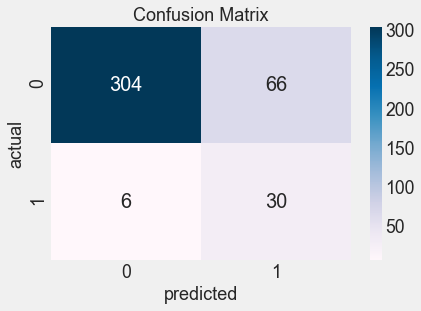

None
Average training accuracy: 
 0.8567733990147783
Average validation accuracy: 
 0.8221674876847291
Average training recall: 
 1.0
Average validation recall: 
 0.7288288288288288

Model"s ROC-AUC score: 
 0.8274774774774776


In [100]:
rf_under_pipe = Pipeline(steps=[('preprocess', preprocessor),
                                ('under', under),
                                ('classifier', RandomForestClassifier())])

cv = StratifiedKFold()
rf_under_train_acc = []
rf_under_test_acc = []
rf_under_train_recall = []
rf_under_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    urp = rf_under_pipe
    urp.fit(X_t, y_t)
    y_hat_t = urp.predict(X_t)
    
    rf_under_train_acc.append(accuracy_score(y_t, y_hat_t))
    rf_under_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = urp.predict(X_val)
    
    rf_under_test_acc.append(accuracy_score(y_val, y_hat_val))
    rf_under_test_recall.append(recall_score(y_val, y_hat_val))
    
print(fn.evaluation(y_val, y_hat_val))
print('Average training accuracy: \n', np.mean(rf_under_train_acc))
print('Average validation accuracy: \n', np.mean(rf_under_test_acc))
print('Average training recall: \n', np.mean(rf_under_train_recall))
print('Average validation recall: \n', np.mean(rf_under_test_recall))
under_rf_fpr, under_rf_tpr, thresholds = roc_curve(y_val, urp.predict(X_val))
under_rf_roc_auc = auc(under_rf_fpr, under_rf_tpr)
print('\nModel"s ROC-AUC score: \n', under_rf_roc_auc)

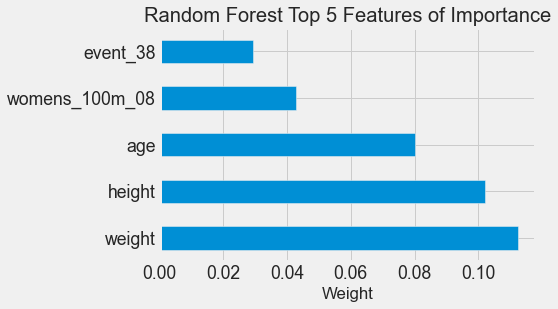

In [147]:
feat_importances2 = pd.Series(rf_under_pipe.named_steps['classifier'].feature_importances_, index=numeric_features_list)
feat_importances2.nlargest(5).plot(kind='barh')
plt.title('Random Forest Top 5 Features of Importance')
plt.xlabel('Weight')
plt.savefig('../figures/feat_imp.png', orientation='landscape', bbox_inches='tight',
           transparent=True)

### Evaluation
- The Random Forest Classifier with Random Undersampling achieved a higher recall score on the validation set but the roc-auc score decreased around 5% from the same classifier with SMOTE Oversampling.


## XGBoost Classifier

In [67]:
xg_pipe = Pipeline(steps=[('preprocess', preprocessor),
                       ('classifier', xgb.XGBClassifier())])

cv = StratifiedKFold()
xg_train_acc = []
xg_test_acc = []
xg_train_recall = []
xg_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    xp = xg_pipe
    xp.fit(X_t, y_t)
    y_hat_t = xp.predict(X_t)
    
    xg_train_acc.append(accuracy_score(y_t, y_hat_t))
    xg_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = xp.predict(X_val)
    
    xg_test_acc.append(accuracy_score(y_val, y_hat_val))
    xg_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(xg_train_acc))
print('Average validation accuracy: \n', np.mean(xg_test_acc))
print('Average training recall: \n', np.mean(xg_train_recall))
print('Average validation recall: \n', np.mean(xg_test_recall))
xg_fpr, xg_tpr, thresholds = roc_curve(y_val, xp.predict(X_val))
xg_roc_auc = auc(xg_fpr, xg_tpr)
print('\nModel"s ROC-AUC score: \n', xg_roc_auc)

Average training accuracy: 
 0.9903940886699507
Average validation accuracy: 
 0.9551724137931036
Average training recall: 
 0.8940246368817798
Average validation recall: 
 0.6148648648648649

Model"s ROC-AUC score: 
 0.870945945945946


## Evaluation
- This model performed similarly to the Decision Tree and Random Forest Classifiers.
- The training and validation accuracy are close but the recall is off by around 9%.
- An roc-auc score of around 87% is also similar to the previous classifiers.

## XGBoost Classifier in SMOTE pipeline

In [90]:
smote = SMOTE(random_state=42)

In [73]:
xg_smote_pipe = Pipeline(steps=[('preprocess', preprocessor),
                                ('smote', smote),
                                ('classifier', xgb.XGBClassifier())])

cv = StratifiedKFold()
xg_smote_train_acc = []
xg_smote_test_acc = []
xg_smote_train_recall = []
xg_smote_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    sxg = xg_smote_pipe
    sxg.fit(X_t, y_t)
    y_hat_t = sxg.predict(X_t)
    
    xg_smote_train_acc.append(accuracy_score(y_t, y_hat_t))
    xg_smote_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = sxg.predict(X_val)
    
    xg_smote_test_acc.append(accuracy_score(y_val, y_hat_val))
    xg_smote_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(xg_smote_train_acc))
print('Average validation accuracy: \n', np.mean(xg_smote_test_acc))
print('Average training recall: \n', np.mean(xg_smote_train_recall))
print('Average validation recall: \n', np.mean(xg_smote_test_recall))
smote_xg_fpr, smote_xg_tpr, thresholds = roc_curve(y_val, sxg.predict(X_val))
smote_xg_roc_auc = auc(smote_xg_fpr, smote_xg_tpr)
print('\nModel"s ROC-AUC score: \n', smote_xg_roc_auc)

Average training accuracy: 
 0.9917487684729064
Average validation accuracy: 
 0.9502463054187192
Average training recall: 
 0.9089906232763376
Average validation recall: 
 0.6310810810810811

Model"s ROC-AUC score: 
 0.8655405405405405


## Evaluation
- The XGBoost Classifier trained on SMOTE oversampled data performed on par with the Random Forest Classifier achieving an average recall score of 63% on the validation set.
- The roc-auc score for this model was 87%

 Next, I will try to add random undersampling to the pipeline.

### Random Under Sampling on XGBoost
- random undersampling strategy .2

In [94]:
under = RandomUnderSampler(.2,random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       370
           1       0.76      0.81      0.78        36

    accuracy                           0.96       406
   macro avg       0.87      0.89      0.88       406
weighted avg       0.96      0.96      0.96       406

Recall:  0.8055555555555556
Accuracy:  0.9605911330049262
Precision:  0.7631578947368421
F1:  0.7837837837837838


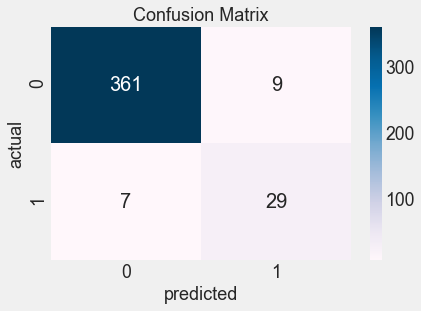

None
Average training accuracy: 
 0.9839901477832512
Average validation accuracy: 
 0.9394088669950739
Average training recall: 
 0.9470123184408898
Average validation recall: 
 0.653003003003003

Model"s ROC-AUC score: 
 0.8906156156156156


In [95]:
xg_under_pipe = Pipeline(steps=[('preprocess', preprocessor),
                                ('under', under),
                                ('classifier', xgb.XGBClassifier())])

cv = StratifiedKFold()
xg_under_train_acc = []
xg_under_test_acc = []
xg_under_train_recall = []
xg_under_test_recall = []
for train_ind, val_ind in cv.split(X_train, y_train):
    X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
    uxg = xg_under_pipe
    uxg.fit(X_t, y_t)
    y_hat_t = uxg.predict(X_t)
    
    xg_under_train_acc.append(accuracy_score(y_t, y_hat_t))
    xg_under_train_recall.append(recall_score(y_t, y_hat_t))
    
    X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
    y_hat_val = uxg.predict(X_val)
    
    xg_under_test_acc.append(accuracy_score(y_val, y_hat_val))
    xg_under_test_recall.append(recall_score(y_val, y_hat_val))
    
print('Average training accuracy: \n', np.mean(xg_under_train_acc))
print('Average validation accuracy: \n', np.mean(xg_under_test_acc))
print('Average training recall: \n', np.mean(xg_under_train_recall))
print('Average validation recall: \n', np.mean(xg_under_test_recall))
under_xg_fpr, under_xg_tpr, thresholds = roc_curve(y_val, uxg.predict(X_val))
under_xg_roc_auc = auc(under_xg_fpr, under_xg_tpr)
print('\nModel"s ROC-AUC score: \n', under_xg_roc_auc)

### Evaluation
- Adding random undersampling to the pipeline produced an average recall score of 65% on the validation set.
- An roc-auc score of 89%

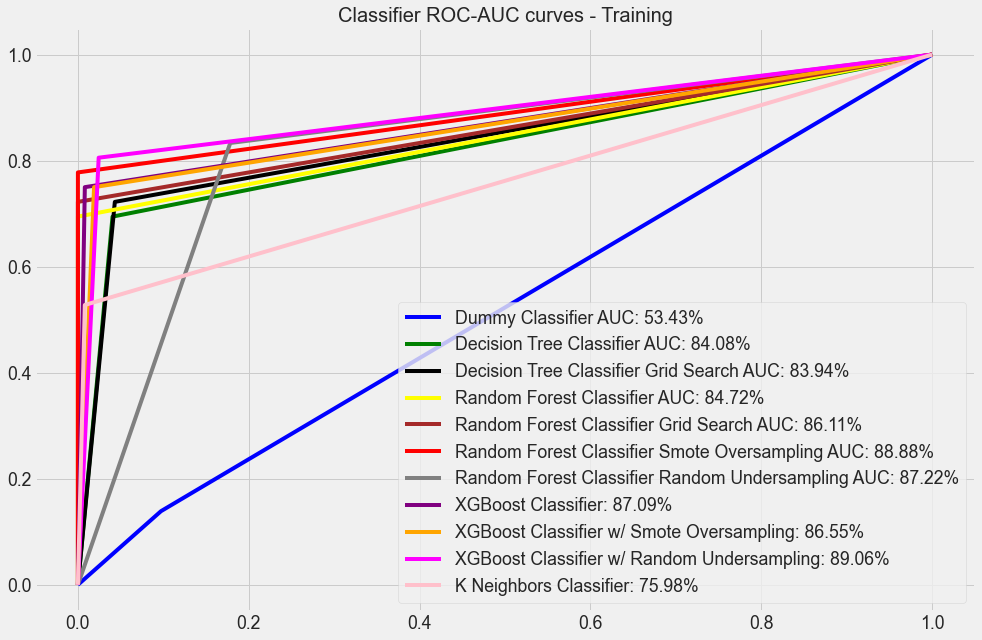

In [101]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))    
plt.plot(fsm_fpr, fsm_tpr, c='blue', label='Dummy Classifier AUC: 53.43%')
plt.plot(dtree_fpr, dtree_tpr, c='green', label='Decision Tree Classifier AUC: 84.08%')
plt.plot(dtree_grid_fpr, dtree_grid_tpr, c='black', label='Decision Tree Classifier Grid Search AUC: 83.94%')
plt.plot(rf_fpr, rf_tpr, c='yellow', label='Random Forest Classifier AUC: 84.72%')
plt.plot(grid_rf_fpr, grid_rf_tpr, c='brown', label='Random Forest Classifier Grid Search AUC: 86.11%')
plt.plot(smote_rf_fpr, smote_rf_tpr, c='red', label='Random Forest Classifier Smote Oversampling AUC: 88.88%')
plt.plot(under_rf_fpr, under_rf_tpr, c='grey', label='Random Forest Classifier Random Undersampling AUC: 87.22%')
plt.plot(xg_fpr, xg_tpr, c='purple', label='XGBoost Classifier: 87.09%')
plt.plot(smote_xg_fpr, smote_xg_tpr, c='orange', label='XGBoost Classifier w/ Smote Oversampling: 86.55%')
plt.plot(under_xg_fpr, under_xg_tpr, c='magenta', label='XGBoost Classifier w/ Random Undersampling: 89.06%')
plt.plot(knn_fpr, knn_tpr, c='pink', label='K Neighbors Classifier: 75.98%')
plt.title('Classifier ROC-AUC curves - Training', fontsize=20)
plt.legend(loc='best')
plt.savefig()

#### From the plot above it looks like the XGBoost Classifier produced the best roc-auc curve with 89.06% under the curve. 

## Evaluating the classifiers on the hold out test data

In [102]:
classifier_acc_scores = []
classifier_recall_scores = []
classifier_training_recall_scores = []
classifier_training_acc_scores = []
classifiers = ['DUMMY CLASSIFIER', 'DECISION TREE', 'DECISION TREE GRID SEARCH',
              'RANDOM FOREST', 'RANDOM FOREST GRID SEARCH', 'RANDOM FOREST SMOTE',
               'RANDOM FOREST RAND UNDER',
               'XGBOOST', 'XGB SMOTE', 'XGB RAND UNDER',
              'KNN']

### Dummy Classifier 

In [103]:
bp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, bp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, bp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, bp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, bp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, bp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, bp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, bp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, bp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, bp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, bp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, bp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, bp.predict(X_train)))


Testing Accuracy: 
 0.8138847858197932

Testing Precision: 
 0.06060606060606061

Testing Recall: 
 0.09836065573770492

Testing F1: 
 0.08

Training Accuracy: 
 0.8369458128078818

Training Precision: 
 0.0972972972972973

Training Recall: 
 0.06521739130434782

Training F1: 
 0.06666666666666665


### Decision Tree Classifier

In [104]:
dp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, dp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, dp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, dp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, dp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, dp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, dp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, dp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, dp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, dp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, dp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, dp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, dp.predict(X_train)))


Testing Accuracy: 
 0.9409158050221565

Testing Precision: 
 0.6615384615384615

Testing Recall: 
 0.7049180327868853

Testing F1: 
 0.6825396825396826

Training Accuracy: 
 1.0

Training Precision: 
 1.0

Training Recall: 
 1.0

Training F1: 
 1.0


### Decision Tree Grid Search

In [105]:
grid_dp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, grid_dp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, grid_dp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, grid_dp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, grid_dp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, grid_dp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, grid_dp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, grid_dp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, grid_dp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, grid_dp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, grid_dp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, grid_dp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, grid_dp.predict(X_train)))


Testing Accuracy: 
 0.948301329394387

Testing Precision: 
 0.7166666666666667

Testing Recall: 
 0.7049180327868853

Testing F1: 
 0.7107438016528925

Training Accuracy: 
 1.0

Training Precision: 
 1.0

Training Recall: 
 1.0

Training F1: 
 1.0


### Random Forest Classifier

In [106]:
rp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, rp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, rp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, rp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, rp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, rp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, rp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, rp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, rp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, rp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, rp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, rp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, rp.predict(X_train)))


Testing Accuracy: 
 0.96602658788774

Testing Precision: 
 0.9523809523809523

Testing Recall: 
 0.6557377049180327

Testing F1: 
 0.7766990291262135

Training Accuracy: 
 0.9995073891625615

Training Precision: 
 1.0

Training Recall: 
 0.9945652173913043

Training F1: 
 0.9972752043596731


### Random Forest Grid Search

In [107]:
grid_rp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, grid_rp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, grid_rp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, grid_rp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, grid_rp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, grid_rp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, grid_rp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, grid_rp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, grid_rp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, grid_rp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, grid_rp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, grid_rp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, grid_rp.predict(X_train)))


Testing Accuracy: 
 0.9689807976366323

Testing Precision: 
 0.9761904761904762

Testing Recall: 
 0.6721311475409836

Testing F1: 
 0.7961165048543689

Training Accuracy: 
 1.0

Training Precision: 
 1.0

Training Recall: 
 1.0

Training F1: 
 1.0


### Random Forest with SMOTE Oversampling

In [108]:
srp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, srp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, srp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, srp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, srp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, srp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, srp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, srp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, srp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, srp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, srp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, srp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, srp.predict(X_train)))


Testing Accuracy: 
 0.9675036927621861

Testing Precision: 
 0.9333333333333333

Testing Recall: 
 0.6885245901639344

Testing F1: 
 0.7924528301886792

Training Accuracy: 
 1.0

Training Precision: 
 1.0

Training Recall: 
 1.0

Training F1: 
 1.0


### Random Forest with Random Undersampling

In [109]:
urp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, urp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, urp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, urp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, urp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, urp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, urp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, urp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, urp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, urp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, urp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, urp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, urp.predict(X_train)))


Testing Accuracy: 
 0.8330871491875923

Testing Precision: 
 0.3194444444444444

Testing Recall: 
 0.7540983606557377

Testing F1: 
 0.448780487804878

Training Accuracy: 
 0.8871921182266009

Training Precision: 
 0.44552058111380144

Training Recall: 
 1.0

Training F1: 
 0.6164154103852596


### XGBoost Classifier

In [110]:
xp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, xp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, xp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, xp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, xp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, xp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, xp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, xp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, xp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, xp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, xp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, xp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, xp.predict(X_train)))


Testing Accuracy: 
 0.9630723781388478

Testing Precision: 
 0.9090909090909091

Testing Recall: 
 0.6557377049180327

Testing F1: 
 0.761904761904762

Training Accuracy: 
 0.9866995073891626

Training Precision: 
 1.0

Training Recall: 
 0.8532608695652174

Training F1: 
 0.9208211143695015


### XGBoost Classifier with SMOTE Oversampling

In [111]:
sxg.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, sxg.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, sxg.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, sxg.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, sxg.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, sxg.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, sxg.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, sxg.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, sxg.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, sxg.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, sxg.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, sxg.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, sxg.predict(X_train)))


Testing Accuracy: 
 0.9527326440177253

Testing Precision: 
 0.7735849056603774

Testing Recall: 
 0.6721311475409836

Testing F1: 
 0.719298245614035

Training Accuracy: 
 0.9886699507389163

Training Precision: 
 0.9938650306748467

Training Recall: 
 0.8804347826086957

Training F1: 
 0.9337175792507204


### XGBoost Classifier with Random Undersampling

In [112]:
uxg.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, uxg.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, uxg.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, uxg.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, uxg.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, uxg.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, uxg.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, uxg.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, uxg.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, uxg.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, uxg.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, uxg.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, uxg.predict(X_train)))


Testing Accuracy: 
 0.9571639586410635

Testing Precision: 
 0.82

Testing Recall: 
 0.6721311475409836

Testing F1: 
 0.7387387387387387

Training Accuracy: 
 0.9847290640394089

Training Precision: 
 0.9371428571428572

Training Recall: 
 0.8913043478260869

Training F1: 
 0.9136490250696379


### K Nearest Neighbors Classifier

In [113]:
kp.fit(X_train, y_train)
print('\nTesting Accuracy: \n', accuracy_score(y_test, kp.predict(X_test)))
print('\nTesting Precision: \n', precision_score(y_test, kp.predict(X_test)))
print('\nTesting Recall: \n', recall_score(y_test, kp.predict(X_test)))
print('\nTesting F1: \n', f1_score(y_test, kp.predict(X_test)))
print('\nTraining Accuracy: \n', accuracy_score(y_train, kp.predict(X_train)))
print('\nTraining Precision: \n', precision_score(y_train, kp.predict(X_train)))
print('\nTraining Recall: \n', recall_score(y_train, kp.predict(X_train)))
print('\nTraining F1: \n', f1_score(y_train, kp.predict(X_train)))
classifier_acc_scores.append(accuracy_score(y_test, kp.predict(X_test)))
classifier_recall_scores.append(recall_score(y_test, kp.predict(X_test)))
classifier_training_acc_scores.append(accuracy_score(y_train, kp.predict(X_train)))
classifier_training_recall_scores.append(recall_score(y_train, kp.predict(X_train)))


Testing Accuracy: 
 0.9453471196454948

Testing Precision: 
 0.74

Testing Recall: 
 0.6065573770491803

Testing F1: 
 0.6666666666666666

Training Accuracy: 
 0.9497536945812808

Training Precision: 
 0.8596491228070176

Training Recall: 
 0.532608695652174

Training F1: 
 0.6577181208053693


In [121]:
scores_df = pd.DataFrame(classifier_acc_scores, index=classifiers)
scores_df.insert(1, 'recall', classifier_recall_scores)
scores_df.rename(columns={0: 'accuracy'}, inplace=True)
scores_df.insert(2, 'training_accuracy', classifier_training_acc_scores)
scores_df.insert(3, 'training_recall', classifier_training_recall_scores)

scores_df.accuracy = [round(x*100, 2) for x in scores_df.accuracy]
scores_df.recall = [round(x*100, 2) for x in scores_df.recall]
scores_df.training_accuracy = [round(x*100, 2) for x in scores_df.training_accuracy]
scores_df.training_recall = [round(x*100, 2) for x in scores_df.training_recall]
scores_df

,accuracy,recall,training_accuracy,training_recall
DUMMY CLASSIFIER,83.60,8.20,82.96,9.78
DECISION TREE,94.09,70.49,100.00,100.00
DECISION TREE GRID SEARCH,94.83,70.49,100.00,100.00
RANDOM FOREST,96.60,65.57,99.95,99.46
RANDOM FOREST GRID SEARCH,96.90,67.21,100.00,100.00
RANDOM FOREST SMOTE,96.75,68.85,100.00,100.00
RANDOM FOREST RAND UNDER,83.31,75.41,88.72,100.00
XGBOOST,96.31,65.57,98.67,85.33
XGB SMOTE,95.27,67.21,98.87,88.04
XGB RAND UNDER,95.72,67.21,98.47,89.13


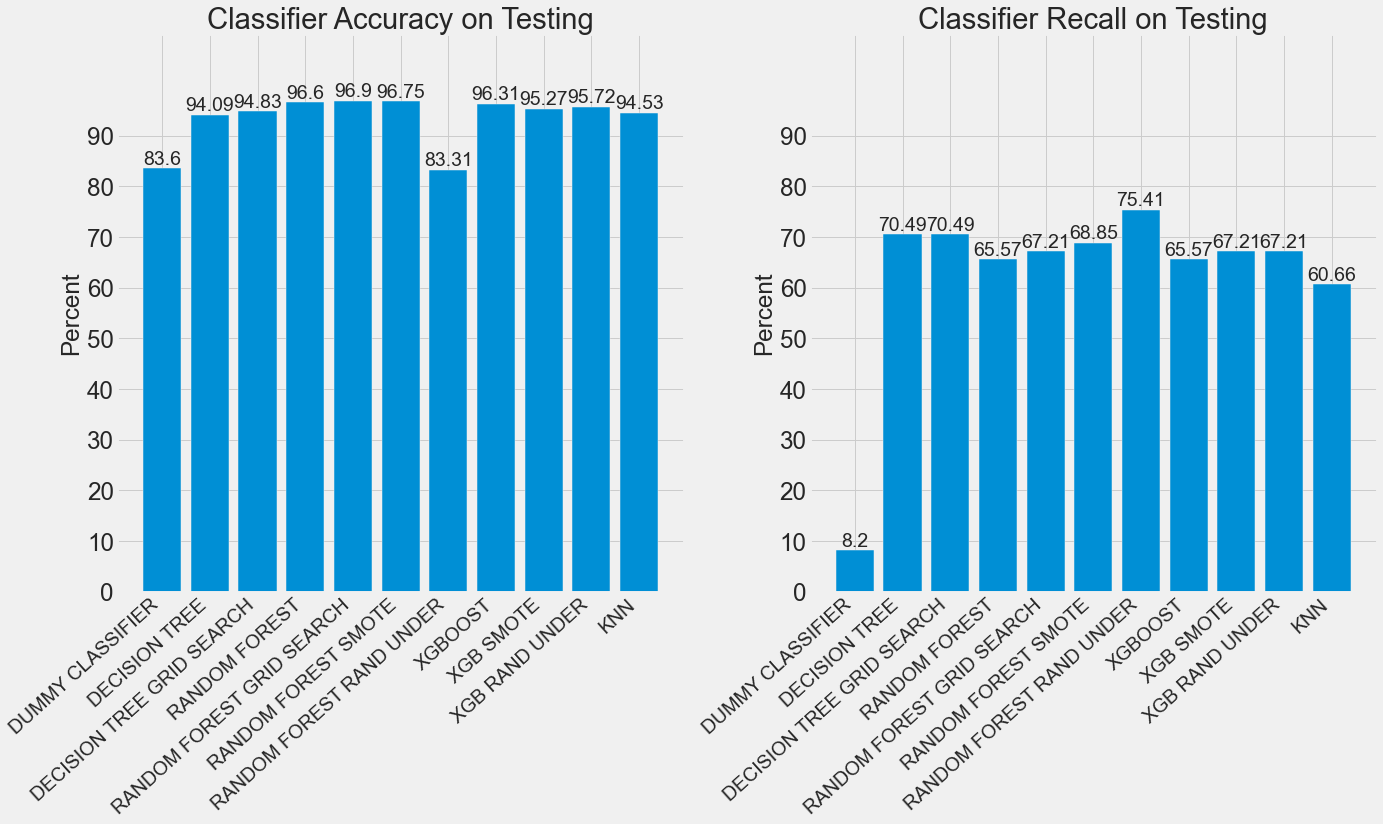

In [126]:
width = 0.3
labels = scores_df.index
f_dict = {'fontsize': 20,
        'fontweight': 10,
        'horizontalalignment': 'right'}




fig, ax = plt.subplots(1,2, figsize=(20,12), dpi=70)
rect = ax[0].bar(scores_df.index, scores_df['accuracy'])
ax[0].set_ylabel('Percent', fontsize=25)
ax[0].set_title('Classifier Accuracy on Testing', fontsize=30)
ax[0].set_xticklabels(labels, fontsize=18, rotation=42, fontdict=f_dict)
ax[0].set_ylim(0,110)
ax[0].set_yticks(np.arange(0,100, 10))
ax[0].set_yticklabels(np.arange(0,100, 10), fontsize=25)

def autolabel(rects, ax_loc):
    for rect in rects:
        height = rect.get_height()
        ax[ax_loc].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

autolabel(rect, 0)

rect = ax[1].bar(scores_df.index, scores_df['recall'])
ax[1].set_ylabel('Percent', fontsize=25)
ax[1].set_title('Classifier Recall on Testing', fontsize=30)
ax[1].set_xticklabels(labels, fontsize=25, rotation=42, fontdict=f_dict)
ax[1].set_ylim(0,110)
ax[1].set_yticks(np.arange(0,100, 10))
ax[1].set_yticklabels(np.arange(0,100, 10), fontsize=25)

autolabel(rect, 1)

plt.tight_layout()
plt.savefig('../figures/testing_acc_recall.png', dpi='figure', orientation='landscape', bbox_inches='tight',
           transparent=True)
plt.show;

In [118]:
test_fsm_fpr, test_fsm_tpr, thresholds = roc_curve(y_test, bp.predict(X_test))
test_fsm_roc_auc = auc(test_fsm_fpr, test_fsm_tpr)
print('\nFSM roc-auc score: \n', test_fsm_roc_auc)

test_dtree_fpr, test_dtree_tpr, thresholds = roc_curve(y_test, dp.predict(X_test))
test_dtree_roc_auc = auc(test_dtree_fpr, test_dtree_tpr)
print('\nDecision Tree Classifier roc-auc score: \n', test_dtree_roc_auc)

test_dtree_grid_fpr, test_dtree_grid_tpr, thresholds = roc_curve(y_test, grid_dp.predict(X_test))
test_dtree_grid_roc_auc = auc(test_dtree_grid_fpr, test_dtree_grid_tpr)
print('\nDecision Tree Grid Search roc-auc score: \n', test_dtree_grid_roc_auc)

test_rf_fpr, test_rf_tpr, thresholds = roc_curve(y_test, rp.predict(X_test))
test_rf_roc_auc = auc(test_rf_fpr, test_rf_tpr)
print('\nRandom Forest Classifier roc-auc score: \n', test_rf_roc_auc)

test_grid_rf_fpr, test_grid_rf_tpr, thresholds = roc_curve(y_test, grid_rp.predict(X_test))
test_grid_rf_roc_auc = auc(test_grid_rf_fpr, test_grid_rf_tpr)
print('\nRandom Forest Grid Search roc-auc score: \n', test_grid_rf_roc_auc)

test_xg_fpr, test_xg_tpr, thresholds = roc_curve(y_test, xp.predict(X_test))
test_xg_roc_auc = auc(test_xg_fpr, test_xg_tpr)
print('\nXGBoost Classifier roc-auc score: \n', test_xg_roc_auc)

test_knn_fpr, test_knn_tpr, thresholds = roc_curve(y_test, kp.predict(X_test))
test_knn_roc_auc = auc(test_knn_fpr, test_knn_tpr)
print('\nK Nearest Neighbors Classifier roc-auc score: \n', test_knn_roc_auc)

test_smote_rf_fpr, test_smote_rf_tpr, thresholds = roc_curve(y_test, srp.predict(X_test))
test_smote_rf_roc_auc = auc(test_smote_rf_fpr, test_smote_rf_tpr)
print('\nRandom Forest with SMOTE roc-auc score: \n', test_smote_rf_roc_auc)

test_under_rf_fpr, test_under_rf_tpr, thresholds = roc_curve(y_test, urp.predict(X_test))
test_under_rf_roc_auc = auc(test_under_rf_fpr, test_under_rf_tpr)
print('\nRandom Forest with Random Undersampling roc-auc score: \n', test_under_rf_roc_auc)

test_smote_xg_fpr, test_smote_xg_tpr, thresholds = roc_curve(y_test, sxg.predict(X_test))
test_smote_xg_roc_auc = auc(test_smote_xg_fpr, test_smote_xg_tpr)
print('\nXGBoost Classifier with SMOTE roc-auc score: \n', test_smote_xg_roc_auc)

test_und_xg_fpr, test_und_xg_tpr, thresholds = roc_curve(y_test, uxg.predict(X_test))
test_und_xg_roc_auc = auc(test_und_xg_fpr, test_und_xg_tpr)
print('\nXGBoost Classifier with Random Under Sampling roc-auc score: \n', test_und_xg_roc_auc)


FSM roc-auc score: 
 0.5053491590376837

Decision Tree Classifier roc-auc score: 
 0.8346018735362998

Decision Tree Grid Search roc-auc score: 
 0.8386603150947414

Random Forest Classifier roc-auc score: 
 0.8262454758356397

Random Forest Grid Search roc-auc score: 
 0.8352538854588035

XGBoost Classifier roc-auc score: 
 0.8246220992122631

K Nearest Neighbors Classifier roc-auc score: 
 0.7927267404726421

Random Forest with SMOTE roc-auc score: 
 0.8418272301469022

Random Forest with Random Undersampling roc-auc score: 
 0.7975037257824144

XGBoost Classifier with SMOTE roc-auc score: 
 0.8263253140302322

XGBoost Classifier with Random Under Sampling roc-auc score: 
 0.828760378965297


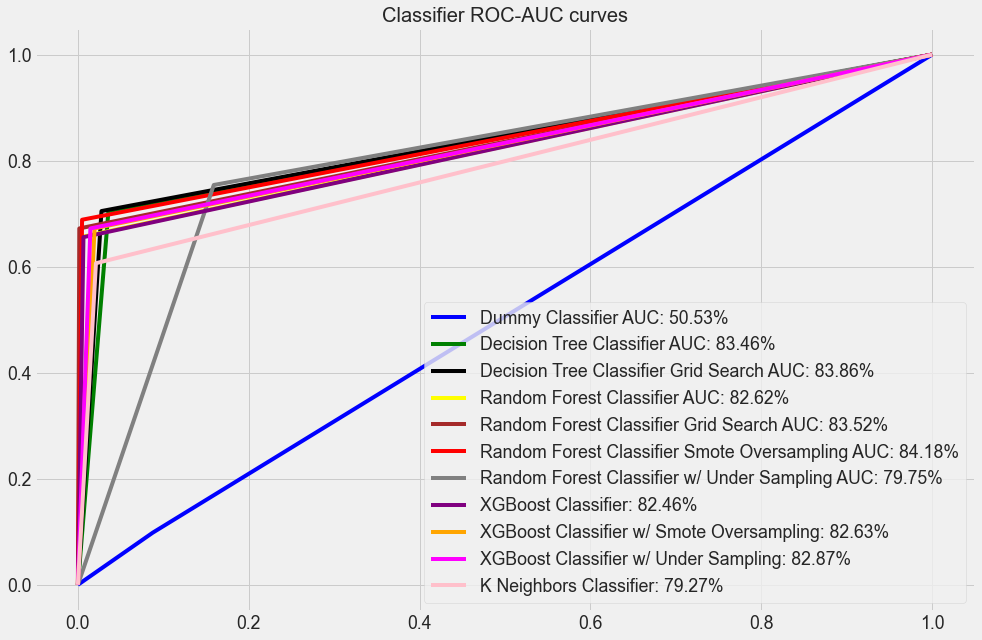

In [123]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))    
plt.plot(test_fsm_fpr, test_fsm_tpr, c='blue', label='Dummy Classifier AUC: 50.53%')
plt.plot(test_dtree_fpr, test_dtree_tpr, c='green', label='Decision Tree Classifier AUC: 83.46%')
plt.plot(test_dtree_grid_fpr, test_dtree_grid_tpr, c='black', label='Decision Tree Classifier Grid Search AUC: 83.86%')
plt.plot(test_rf_fpr, test_rf_tpr, c='yellow', label='Random Forest Classifier AUC: 82.62%')
plt.plot(test_grid_rf_fpr, test_grid_rf_tpr, c='brown', label='Random Forest Classifier Grid Search AUC: 83.52%')
plt.plot(test_smote_rf_fpr, test_smote_rf_tpr, c='red', label='Random Forest Classifier Smote Oversampling AUC: 84.18%')
plt.plot(test_under_rf_fpr, test_under_rf_tpr, c='grey', label='Random Forest Classifier w/ Under Sampling AUC: 79.75%')
plt.plot(test_xg_fpr, test_xg_tpr, c='purple', label='XGBoost Classifier: 82.46%')
plt.plot(test_smote_xg_fpr, test_smote_xg_tpr, c='orange', label='XGBoost Classifier w/ Smote Oversampling: 82.63%')
plt.plot(test_und_xg_fpr, test_und_xg_tpr, c='magenta', label='XGBoost Classifier w/ Under Sampling: 82.87%')
plt.plot(test_knn_fpr, test_knn_tpr, c='pink', label='K Neighbors Classifier: 79.27%')
plt.title('Classifier ROC-AUC curves', fontsize=20)
plt.legend(loc='best')
#plt.savefig('../figures/testing_roc-auc_curves.png', orientation='landscape', bbox_inches='tight',
#           transparent=True)

## Conclusion

- After fitting the classifiers to the entire training set and predicting on the test set, The Random Forest Classifier with Random Undersampling achieved the highest ROC-AUC score at 84.18.
- This model also achieved an accuracy on the test set of 83.31%
- I believe the Random Forest Classifier with Random Undersampling performed the best out of all the classifiers. The model achieved an accuracy score of 83.31% and a recall score of 75.41 on the test set.
- Out of all the Positive PED use cases, the model can successfully classify about 75% of them as positive for PED use.
- I would like to improve upon the class imbalance before deploying this model. Adding in results from another sport such as Cycling may provide the model with relevant data. 
## 

The Random Forest Classifier uses the athletes' height, weight, and sex as the top three features for classification. This makes sense because those are the features that provide the most data on the athletes at the moment. Moving forward I would like to gather more data on the athletes and feed the model more relevant information. I would also like to spend more time during the initial combining of the datasets in order to match results on as many athletes as possible.